In [1]:
# !pip list | grep bertopic

bertopic                                 0.15.0


In [2]:
# %pip install bertopic==0.15.0

Note: you may need to restart the kernel to use updated packages.


In [16]:
import os
import re
import pandas as pd
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

from bertopic import BERTopic

pd.set_option('display.max_colwidth', 500)

In [17]:
import nltk

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from google.cloud import storage

storage_client = storage.Client()

bucket_name = "nlp_finalproject"

# Creates the new bucket
bucket = storage_client.bucket(bucket_name)
print(f"Bucket {bucket.name} connected.")

Bucket nlp_finalproject connected.


In [20]:
df_final4 = pd.read_parquet("gs://nlp_finalproject/FilteredDataset.parquet", engine='pyarrow')
df_final4.head(5)

url  \
0  http://galusaustralis.com/2020/02/486473/legaltech-artificial-intelligence-market-2019-technology-advancement-and-future-scope-casetext-inc-catalyst-repository-systems-ebrevia/   
4                                                                  http://www.millenniumpost.in/big-stories/ai-express-aircraft-skids-off-runaway-in-kozhikode-rescue-ops-on-414926   
7                                                    http://www.peripherals.consumerelectronicsnet.com/multicoreware-inc-becomes-cevas-trusted-partner-for-imaging-computer-vision/   
8                   http://www.sbwire.com/press-releases/healthcare-artificial-intelligence-market-next-big-thing-major-giants-general-electric-medtronic-aicure-apixio-1363690.htm   
9                                                     https://3wnews.org/industry/704499/artificial-intelligence-as-a-service-market-opportunities-market-analysis-outlook-to-2027/   

        date language  \
0 2020-02-26       en   
4 2020-08-07       en   
7 2021-02-25       en   
8 2022-10-06       en   
9 2020-04-29       en   

                                                                                                                                                           title  \
0  LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope – Casetext Inc., Catalyst Repository Systems, eBREVIA – Galus Australis   
4                                                                                                      Two dead as AI Express flight skids off Kozhikode airport   
7                                                     MulticoreWare Inc. Becomes CEVA’s Trusted Partner for Imaging & Computer Vision – Consumer Electronics Net   
8                                                                               Healthcare Artificial Intelligence Market Analysis and Forecast for Next 5 Years   
9                                        Artificial Intelligence As A Service Market : Opportunities, Market Analysis & Outlook To 2027 – 3w Market News Reports   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  \
0  LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope – Casetext Inc., Catalyst Repository Systems, eBREVIA – Galus Australis          \n\nGalus Australis\n\nBusinessGeneral NewsHealthcareIndustryInternationalLifestyleSci-Tech\n\nWednesday, February 26 2020\n\nTrending\n\nNeedle Counters Market Comprehensive Study by Companies Medline Industries, Boen Healthcare\nSkin Scrub Trays Market Comprehensive Study by Companies Medline Industries, BD, Deroyal\nGlobal P...   
4  Two dead as AI Express flight skids off Kozhikode airportTopLoginSubscribeToggle navigationFeaturesDelhiKolkataNationOpinionEditorialBusinessSportsSunday PostBeyond BygoneEpic PowerIn RetrospectGlobal EyeInlandRoutesBeaconInsightGame OnSafariTrendingCandid TalkGastronomyFact FilesMapping the states of IndiaX/sunday-post/beyond-bygone/sunday-post/epic-power/fact-files/ians-feeds/sundaypost/in-retrospect/mapping-the-states-of-india/puja-special/Reminiscence/sponsored/sundaypost/global-eye/feat...   
7  \n\nMulticoreWare Inc. Becomes CEVA’s Trusted Partner for Imaging & Computer Vision – Consumer Electronics Net\n\n \nSkip to content\n\nConsumer Electronics Net\n\nPrimary Menu\n\nConsumer Electronics Net\n\nSearch for:\n \nHomeNewsMulticoreWare Inc. Becomes CEVA’s Trusted Partner for Imaging & Computer Vision \n \n                                 News\n                             \n \nMulticoreWare Inc. Becomes CEV

In [21]:
news_eng = df_final4[df_final4['language']=='en'].reset_index(drop=True)

# Remove special characters
news_eng['text_clean'] = news_eng['cleaned'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

# Lowercase text
news_eng['text_clean'] = news_eng['text_clean'].str.lower()

# Remove stopwords
stop_words = stopwords.words('english')
stop_words.extend(['facebook'])
news_eng['text_no_stopwords'] = news_eng['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

docs = news_eng['text_no_stopwords'].tolist()

news_eng[['cleaned', 'text_clean', 'text_no_stopwords']].head(5)

cleaned  \
0  LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope   Casetext Inc., Catalyst Repository Systems, eBREVIA   Galus Australis           Galus Australis BusinessGeneral NewsHealthcareIndustryInternationalLifestyleSci-Tech Wednesday, February 26 2020 Trending Needle Counters Market Comprehensive Study by Companies Medline Industries, Boen Healthcare Skin Scrub Trays Market Comprehensive Study by Companies Medline Industries, BD, Deroyal Global Portable Handheld ...   
1  Two dead as AI Express flight skids off Kozhikode airportTop  Toggle navigationFeaturesDelhiKolkataNationOpinionEditorialBusinessSportsSunday PostBeyond BygoneEpic PowerIn RetrospectGlobal EyeInlandRoutesBeaconInsightGame OnSafariTrendingCandid TalkGastronomyFact FilesMapping the states of IndiaX/sunday-post/beyond-bygone/sunday-post/epic-power/fact-files/ians-feeds/sundaypost/in-retrospect/mapping-the-states-of-india/puja-special/Reminiscence/ /sundaypost/global-eye/features/nation/world/te...   
2  MulticoreWare Inc. Becomes CEVA s Trusted Partner for Imaging & Computer Vision   Consumer Electronics Net   Skip to content Consumer Electronics Net Primary Menu Consumer Electronics Net   for:   HomeNewsMulticoreWare Inc. Becomes CEVA s Trusted Partner for Imaging & Computer Vision                                     News                                 MulticoreWare Inc. Becomes CEVA s Trusted Partner for Imaging & Computer Vision                     13 mins ago               MulticoreWar...   
3  Healthcare Artificial Intelligence Market Analysis and Forecast for Next 5 Years     SBWire Sign Up   Our Service Plans & Pricing Newsroom Help About AMA Re  &amp; Media LLP Email Alerts| RSS   Healthcare Artificial Intelligence Market Next Big Thing : Major Giants- General Electric, Medtronic, AiCure, APIXIO Healthcare Artificial Intelligence Market 2022-2028   New Jersey, USA -- (SBWIRE) -- 10/05/2022 --  Advance Market Analytics published a new re  publication on "Healthcare Artificial In...   
4  Artificial Intelligence As A Service Market : Opportunities, Market Analysis & Outlook To 2027   3w Market News Reports           3w Market News Reports 3rd Market Reports and Analytics News Market Reports Industry Analytics Industry Reports Market Re  Business Opportunity Emerging Trends Growth Prospects       HomeIndustryArtificial Intelligence As A Service Market : Opportunities, Market Analysis & Outlook To 2027                  Artificial Intelligence As A Service Market : Opportunities...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            text_clean  \
0  legaltech artificial intelligence market 2019 technology advancement and future scope   casetext inc., catalyst repository systems, ebrevia   galus australis           galus australis businessgeneral newshealthcareindustryinternationallifestylescitech wednesday, february 26 2020 trending needle counters market comprehensive study by companies medline industries, boen healthcare skin scrub trays market comprehensive study by companies medline industries, bd, deroyal global portable handheld e...   
1  two dead as ai express flight skids off kozhikode airporttop  toggle navigationfeaturesdelhikolkatanationopinioneditorialbusinesssportssunday postbeyond bygoneepic powerin retrospectglobal eyeinlandroutesbeaconinsightgame onsafaritrendingcandid talkgastronomyfact filesmapping the states of indiaxsundaypostbeyondbygonesundaypostepicpowerfactfilesiansfeedssundaypostinretrospectmappingthestatesofindiapujaspecialreminiscence sundaypostglobaley

In [22]:
%%time

topic_model = BERTopic(language="english", min_topic_size=100, n_gram_range=(1,2), calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/5104 [00:00<?, ?it/s]

2024-02-29 23:11:31,318 - BERTopic - Transformed documents to Embeddings
2024-02-29 23:13:47,116 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2024-02-29 23:23:46,414 - BERTopic - Clustered reduced embeddings


CPU times: user 1h 26min 19s, sys: 8min 14s, total: 1h 34min 34s
Wall time: 43min 10s


In [23]:
freq = topic_model.get_topic_info()

print(f"Topics found: {freq.shape[0]}")
freq.head(5)

Topics found: 265


Topic  Count                                   Name  \
0     -1  73926                    -1_ai_news_new_data   
1      0   5450    0_gray_gray media_media group_group   
2      1   2560            1_npr_radio_schedule_donate   
3      2   2338  2_ment_cision_products_entertain ment   
4      3   2143          3_chatgpt_openai_gpt4_chatbot   

                                                                                               Representation  \
0                                    [ai, news, new, data, 2023, technology, media, gray, intelligence, said]   
1                       [gray, gray media, media group, group, prnewswire, media, ai, workday, platform, inc]   
2                                   [npr, radio, schedule, donate, programs, public, 000, listen, air, music]   
3  [ment, cision, products, entertain ment, entertain, consumer, overviewview, services, general, ment media]   
4                                    [chatgpt, openai, gpt4, chatbot, users, gpt, 2023, model, language, use]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Representative_Docs  
0  [dayton gastroenterology, llc., incorporates first artificial intelligence system enhanced colonoscopy screenings resources blog journalists log sign data privacy send release news products contact typing field, list results appear automatically updated type. ing content... results found. please change terms try again. news focus browse news releases news releases public company englishonly news releases overview multimedia gallery multimedia photos videos multimedia gallery overview trendin...  
1  [workday announces ai marketplace help customers easily discover deploy industryleading ai ml solutions skip contentsenior connecthome proscontestscape fear stronghurricane centeradvertise wectwatch livenewsweatherinvestigatetraffichealthcape fear weekendsubmit pictureshome meet news teamlive onlinesee it, snap it, send itprevious newscastswect anywherecontestswect jobswect internship programnewsinvestigatecrimeback schoolhere grownationalpoliticselection resultslotterycrimes cape fear1on1 j...  
2  [eating disorders chatbot offered dieting advice, raising fears ai health query show connect contest rules local hosts staff prt public file contest rules local hosts staff prt public file events community calendar public announcements submit event give take community calendar public announcements submit event give take listen listen live podcast directory listen live podcast directory news local regional oklahoma engaged stateimpact oklahoma weather traffic npr national news local regional ...  
3  [figure eight federal selected strategic partner artificial intelligence centers 249 million bpa support acceleration ai ml capabilities resources blog journalists log sign data privacy send release news products overview distribution pr newswire cision communications cloud cision ir products contact general inquiries request demo editorial bureaus partnerships media inquiries worldwide offices typing field, list results appear automatically updated type. ing content... results found. please...  
4  [chatgpt alternatives try right sg th hk style fashion grooming watches culture art design events film tv living music gear motoring tech food drink dining drinks travel hotels resorts travel guides wellness fitness health select alisters august mentors hit list emagazine style fashion grooming watches culture art design events film tv living music gear motoring tech food drink dining drinks travel hotels resorts travel guides wellness fitness

In [24]:
topic_model.get_topic(0)  # Select the most frequent topic

[('gray', 0.006799476195405414),
 ('gray media', 0.005512315677823125),
 ('media group', 0.005434307269161852),
 ('group', 0.004959282564432751),
 ('prnewswire', 0.004159691481481073),
 ('media', 0.003969250020491616),
 ('ai', 0.003925932073729101),
 ('workday', 0.003636326431188259),
 ('platform', 0.0035323948820782888),
 ('inc', 0.003494507265064308)]

CPU times: user 1.66 s, sys: 15.3 ms, total: 1.67 s
Wall time: 1.43 s


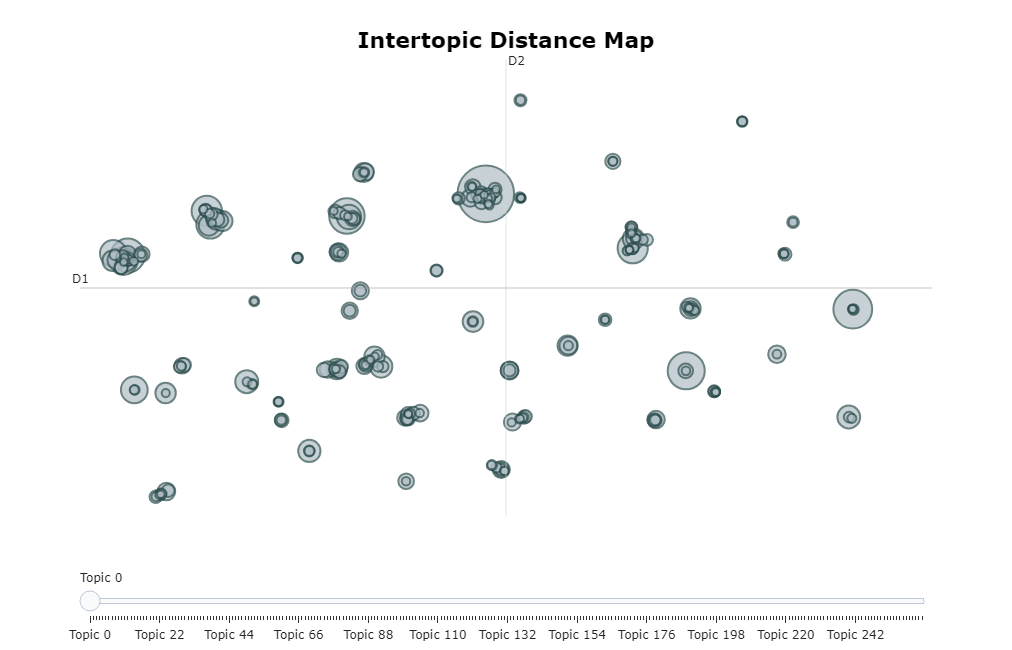

In [25]:
%%time

topic_model.visualize_topics()

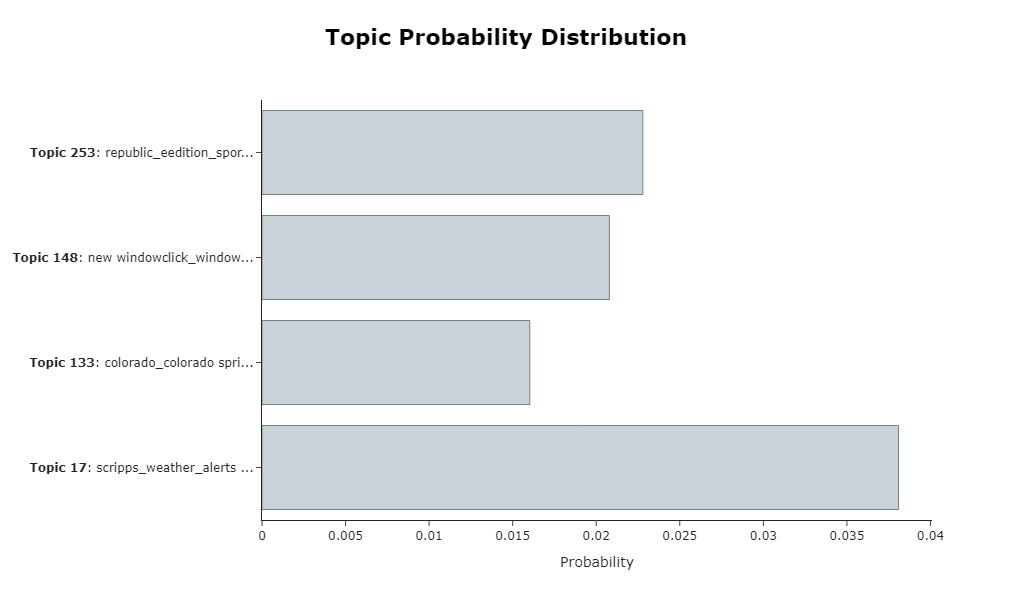

In [26]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

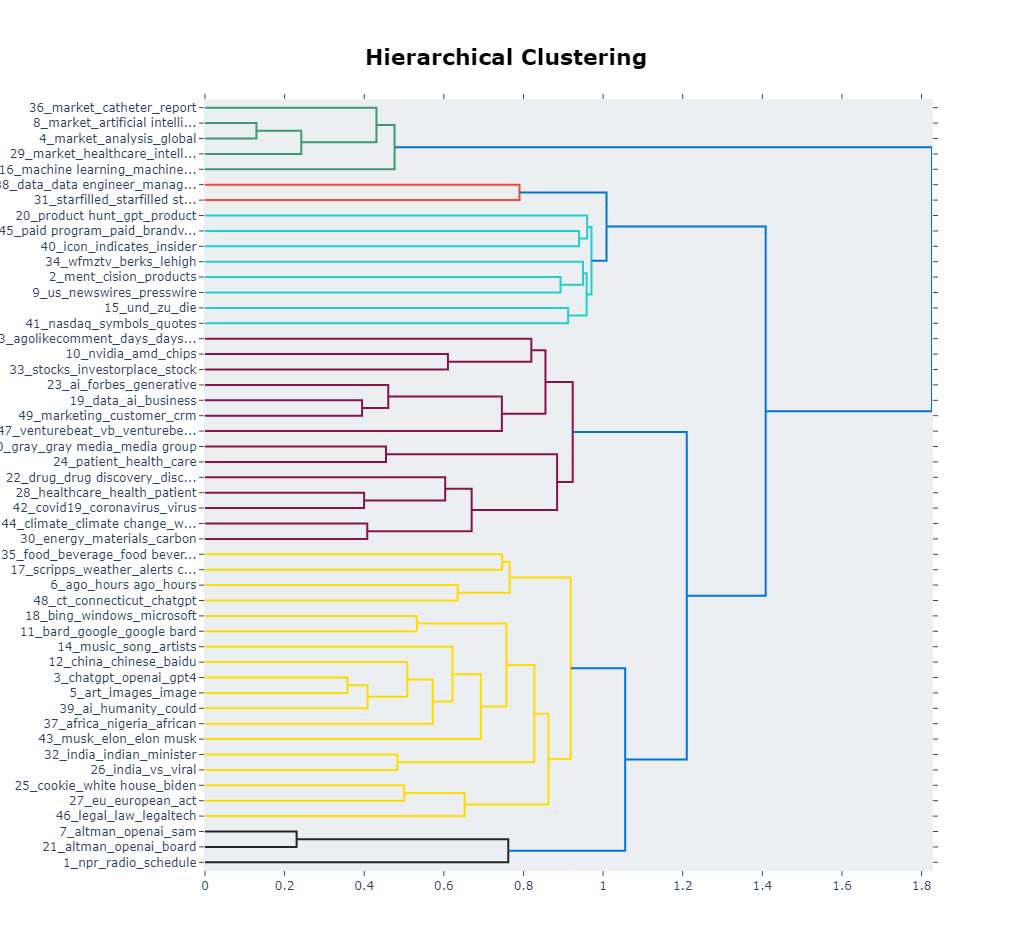

In [27]:
topic_model.visualize_hierarchy(top_n_topics=50)

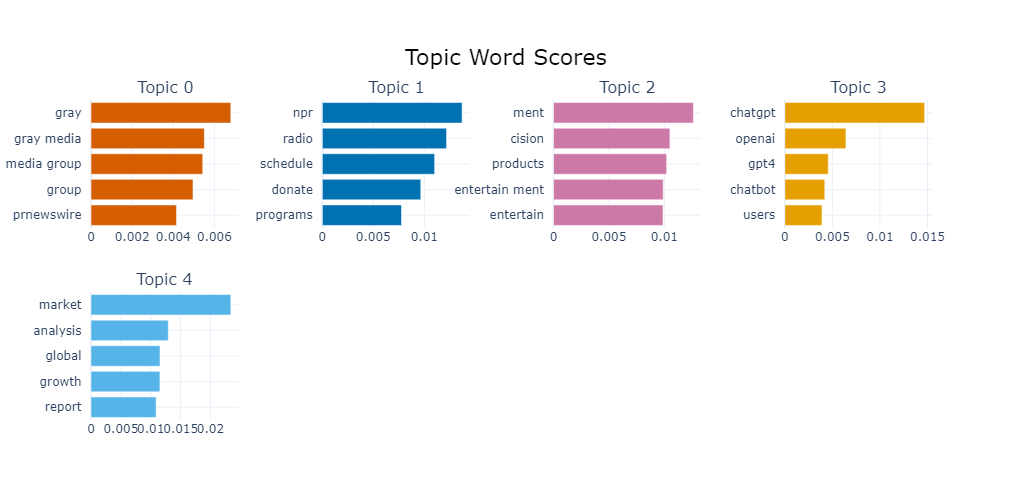

In [28]:
topic_model.visualize_barchart(top_n_topics=5)

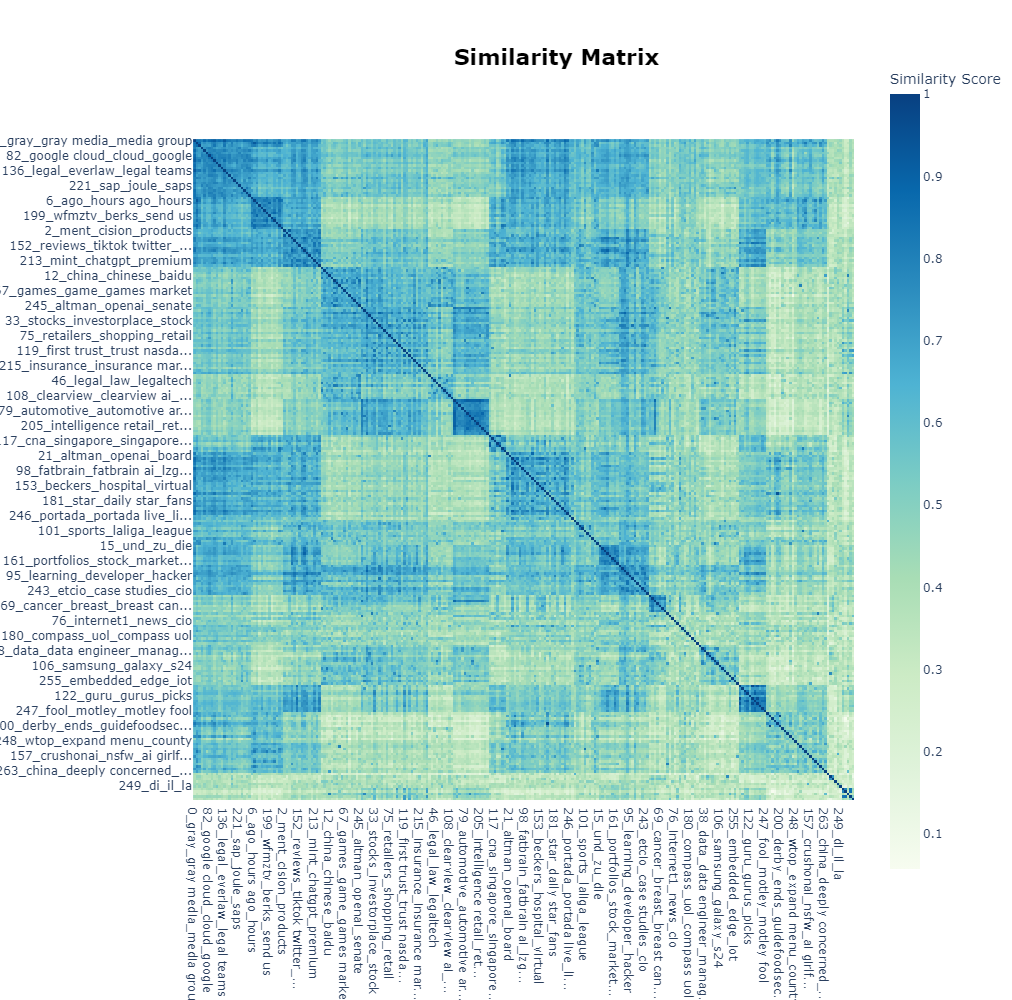

In [29]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

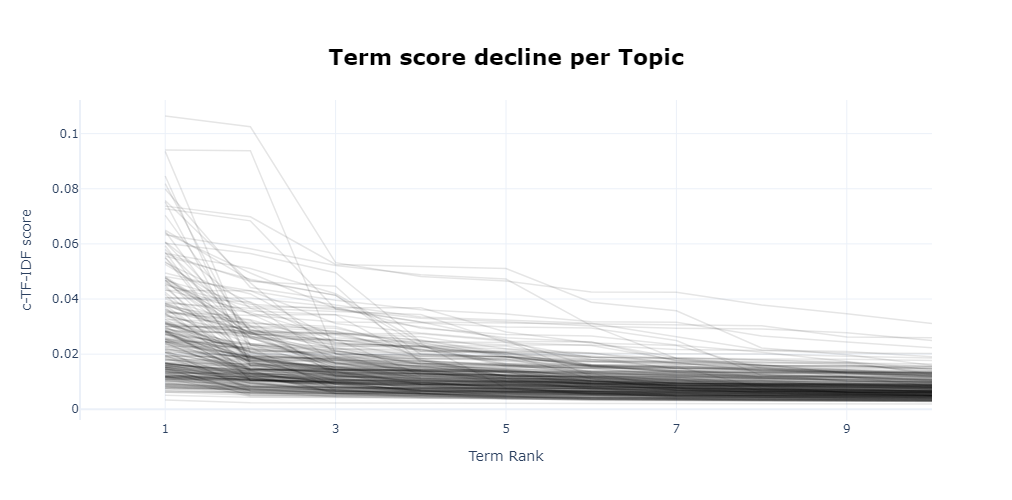

In [30]:
topic_model.visualize_term_rank()

In [2]:
topic_model.update_topics(docs, topics, n_gram_range=(1, 3))

NameError: name 'topic_model' is not defined

In [32]:
topic_model.get_topic(0)   # We select topic that we viewed before

[('gray', 0.00539672039059929),
 ('gray media group', 0.004286140015897992),
 ('gray media', 0.004286140015897992),
 ('media group', 0.004235060607288029),
 ('group', 0.003966703290687683),
 ('ai', 0.0035950128576865315),
 ('media', 0.0032619515659400885),
 ('prnewswire', 0.003189853664194459),
 ('platform', 0.0027976993445367497),
 ('inc', 0.0027920747725801577)]

In [1]:
topic_model.reduce_topics(docs, nr_topics=30)
# topic_model.reduce_topics(docs, nr_topics="auto")

NameError: name 'topic_model' is not defined

In [ ]:
new_topics = topic_model.topics_
new_probs = topic_model.probabilities_

In [ ]:
similar_topics, similarity = topic_model.find_topics("vehicle", top_n=5); similar_topics

In [ ]:
topic_model.get_topic(2)

In [ ]:
path_BERT = 'gs://nlp_finalproject'

if not os.path.isdir(path_BERT): os.mkdir(path_BERT)

In [ ]:
%%time

# Save model
topic_model.save(path_BERT +'/BERT_model')

In [ ]:
%%time

# Load model
saved_model = BERTopic.load(path_BERT +'/BERT_model')